In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as graph
from sklearn import svm


In [2]:
data_set = pd.read_csv('Resources/banknote_data.txt', sep=',', header=None)
data_set.columns = ['variance', 'curtosis', 'skewness', 'entropy', 'is_forged']
data_set = data_set.round(2)

In [7]:
train_data = data_set.sample(frac=0.8)
test_data = data_set.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

train_X = train_data.drop(['entropy', 'is_forged'], 1)
train_Y = train_data['is_forged']

test_X = test_data.drop(['entropy', 'is_forged'], 1)
test_Y = test_data['is_forged']
'''
print(train_X.describe())
print(train_Y.describe())

print(test_X.describe())
print(test_Y.describe())
'''

'\nprint(train_X.describe())\nprint(train_Y.describe())\n\nprint(test_X.describe())\nprint(test_Y.describe())\n'

In [12]:
SVM_Model = svm.SVC(gamma='auto', kernel="linear").fit(train_X, train_Y)
print("Done training!")

Done training!


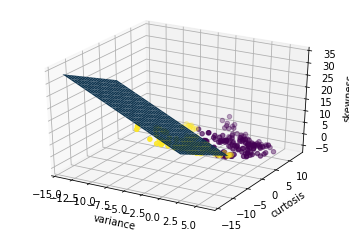

In [20]:
z = lambda x,y: (-SVM_Model.intercept_[0]-SVM_Model.coef_[0][0]*x-SVM_Model.coef_[0][1]*y) / SVM_Model.coef_[0][2]

tmp = np.linspace(round(min(test_X.min(axis=1))),2,round(max(test_X.max(axis=1))))
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = graph.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
scatter = ax.scatter(test_X['variance'], test_X['curtosis'], test_X['skewness'], c=test_Y)
ax.set_xlabel('variance')
ax.set_ylabel('curtosis')
ax.set_zlabel('skewness')
#ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
#ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
graph.show()

In [8]:
fig = graph.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(test_X['variance'], test_X['curtosis'], test_X['skewness'], c=test_Y)
ax.set_xlabel('variance')
ax.set_ylabel('curtosis')
ax.set_zlabel('skewness')
#title = 'Classification Plot using ' + feature_1 + ', ' + feature_2 + ' & ' + feature_3
graph.legend(handles=scatter.legend_elements()[0], labels=["not forged", "forged"])
#graph.title(title)

XX, YY, ZZ = np.mgrid[0:1:255j, 0:1:255j, 0:1:255j]
A = SVM_Model.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]).reshape(XX.shape)
ax.plot_surface(XX, YY, ZZ, A > 0)
#graph.contour(XX, YY, ZZ, A, )

graph.show()



MemoryError: Unable to allocate 380. MiB for an array with shape (3, 255, 255, 255) and data type float64